In [ ]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data - TSLA
test1 = pd.read_csv('TSLA.csv')
test1.head()

#Read Data = FB
test2 = pd.read_csv('FB.csv')
test2.head()

test = pd.concat([test1, test2], axis = 1, ignore_index=True)
print(test)

#combine file 
test.to_csv('combined_file.csv', index=False)

test = pd.read_csv('combined_file.csv')

test.rename(columns={'0': 'Date', '1': 'Open','2': 'High'
,'3': 'Low','4': 'Close','5': 'Adj Close','6': 'Volume','7': 'Date'
,'8': 'Open','9': 'High','10': 'Low','11': 'Close'
,'12': 'Adj Close','13': 'Volume'}, inplace=True)

test.head()


             0          1          2          3          4          5   \
0    2018-01-02  62.400002  64.421997  62.200001  64.106003  64.106003   
1    2018-01-03  64.199997  65.050003  63.110001  63.450001  63.450001   
2    2018-01-04  62.574001  63.709999  61.136002  62.924000  62.924000   
3    2018-01-05  63.324001  63.448002  62.400002  63.316002  63.316002   
4    2018-01-08  63.200001  67.403999  63.099998  67.281998  67.281998   
..          ...        ...        ...        ...        ...        ...   
497  2019-12-23  82.356003  84.402000  82.000000  83.844002  83.844002   
498  2019-12-24  83.671997  85.094002  82.538002  85.050003  85.050003   
499  2019-12-26  85.582001  86.695999  85.269997  86.188004  86.188004   
500  2019-12-27  87.000000  87.061996  85.222000  86.075996  86.075996   
501  2019-12-30  85.758003  85.800003  81.851997  82.940002  82.940002   

           6           7           8           9           10          11  \
0    21761000  2018-01-02  177.679

,Date,Open,High,Low,Close,Adj Close,Volume,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [ ]:
# Closing price
test = test['Adj Close']

test.head()


,Adj Close,Adj Close
0,64.106003,181.419998
1,63.450001,184.669998
2,62.924000,184.330002
3,63.316002,186.850006
4,67.281998,188.279999


In [ ]:
test1.index
test1.set_index('Date', inplace=True)
# test1.drop('Date')
# test1.head()


In [ ]:
# Log of percentage change
tesla = test1['Adj Close'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()


0         NaN
1   -0.010286
2   -0.008325
3    0.006210
4    0.060755
Name: Adj Close, dtype: float64

In [ ]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011505359264493544

In [ ]:
# Log of Percentage change for Facebook
fb = test2['Adj Close'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

0         NaN
1    0.017756
2   -0.001843
3    0.013579
4    0.007624
Name: Adj Close, dtype: float64

In [ ]:
# Variance
var_fb = fb.var()
var_fb


0.0004578567470936306

In [ ]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol


(0.5363151886832394, 0.338325563286914)

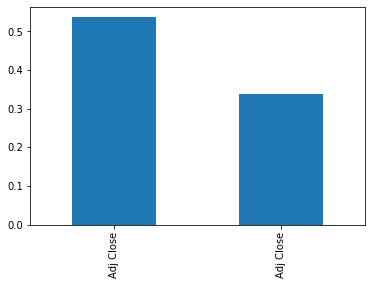

In [ ]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [ ]:
# Log of Percentage change
test_1 = test.pct_change().apply(lambda x: np.log(1+x))
test_1.head()

,Adj Close,Adj Close
0,NaN,NaN
1,-0.010286,0.017756
2,-0.008325,-0.001843
3,0.006210,0.013579
4,0.060755,0.007624


In [ ]:
# Covariance
test_1.cov().iloc[0,1]


0.00018291823760020794

In [ ]:
# Correlation 
test_1.corr().iloc[0,1]

0.25202411995904467

In [ ]:
test_2 = test.pct_change().apply(lambda x: np.log(1+x))
test_2.head()

,Adj Close,Adj Close
0,NaN,NaN
1,-0.010286,0.017756
2,-0.008325,-0.001843
3,0.006210,0.013579
4,0.060755,0.007624


In [ ]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test_2.mean()
e_r_ind

Adj Close    0.000514
Adj Close    0.000238
dtype: float64

In [ ]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

0.00029334593761090643